In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline


pd.pandas.set_option('display.max_column', None)

In [3]:
train = pd.read_csv('train.csv')

print(train.shape)

train.head()

(159256, 24)


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [5]:
train.dtypes

id                       int64
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object

In [6]:
var_wit_na = [var for var in train.columns if train[var].isnull().sum() > 1]

In [7]:
print(var_wit_na)

[]


In [19]:
num_vars = [var for var in train.columns if var not in ['id', 'smoking']]
num_vars

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries']

In [8]:
discrete_vars = [var for var in train.columns if len(train[var].unique())<20 and var not in ['id', 'smoking']]


In [9]:
discrete_vars


['age',
 'height(cm)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'Urine protein',
 'dental caries']

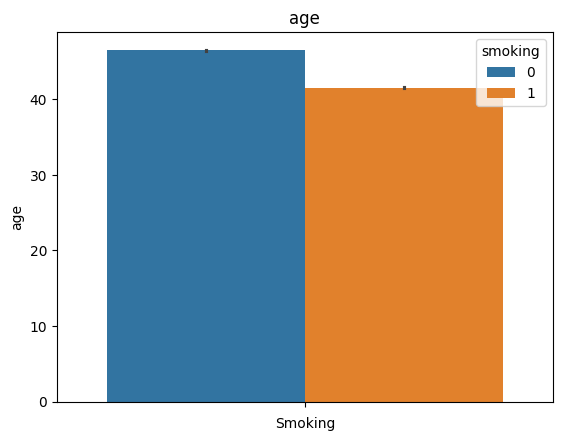

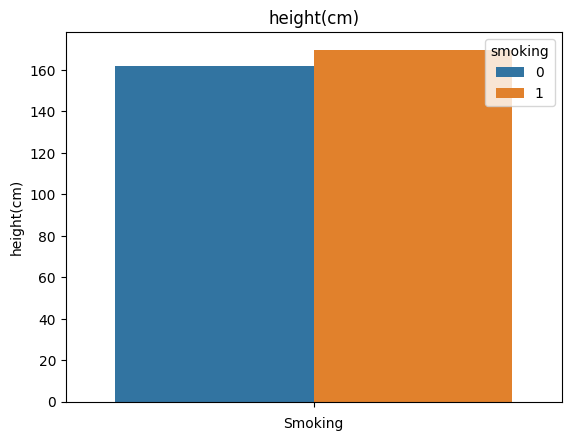

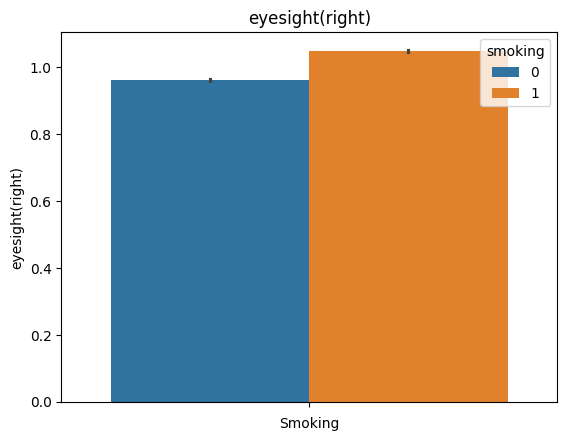

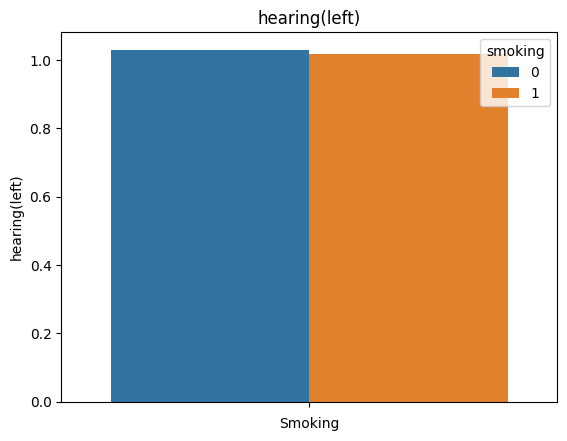

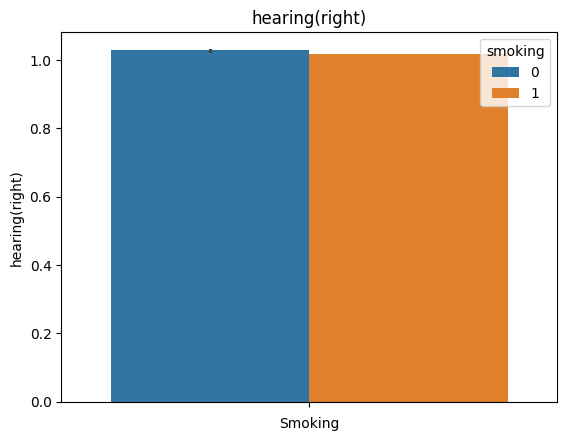

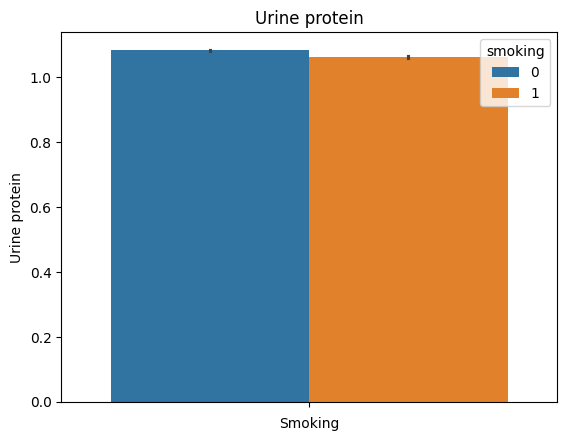

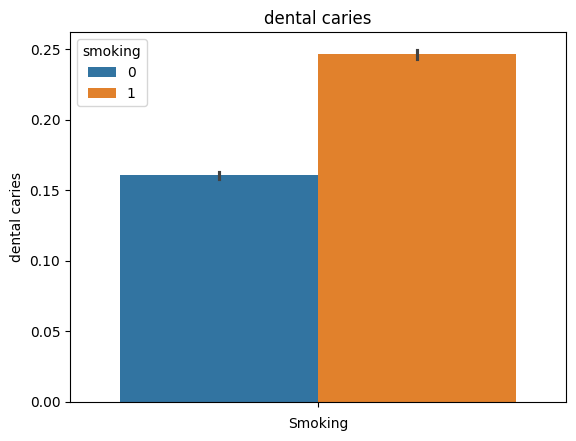

In [10]:
def analyze_discrete(df, var):
    df = df.copy()
    sns.barplot(y= var, hue= 'smoking', data = train)
    plt.title(var)
    plt.xlabel('Smoking')
    plt.show()

for num in discrete_vars:

    analyze_discrete(train, num)

In [11]:
cont_vars = [var for var in train.columns if var not in ['id', 'smoking']\
             and var not in discrete_vars]

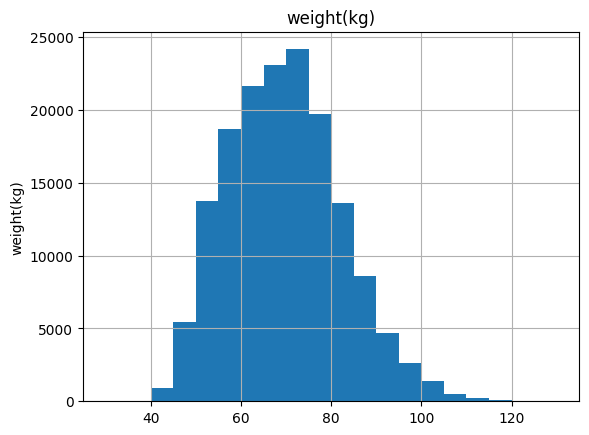

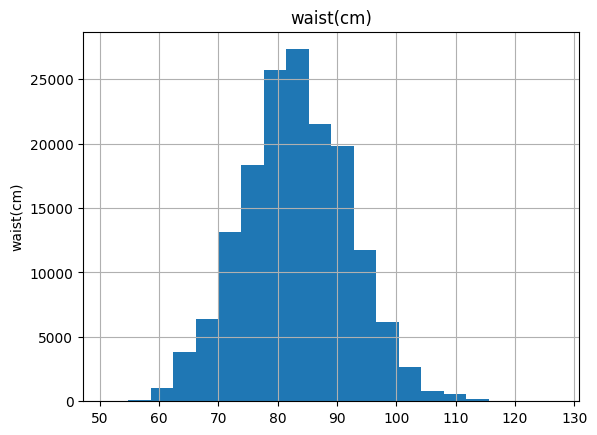

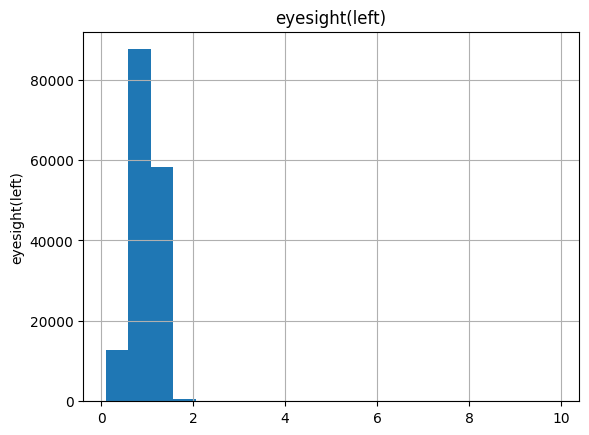

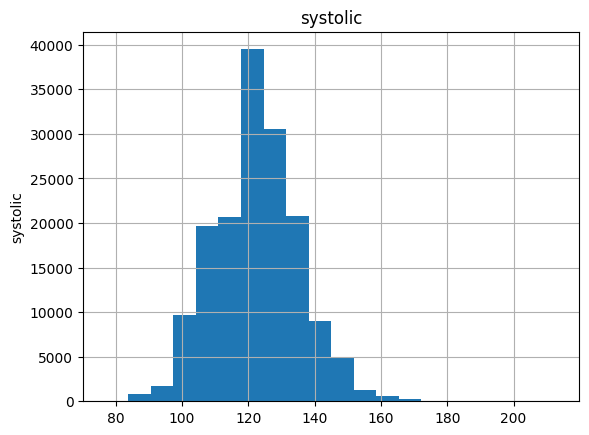

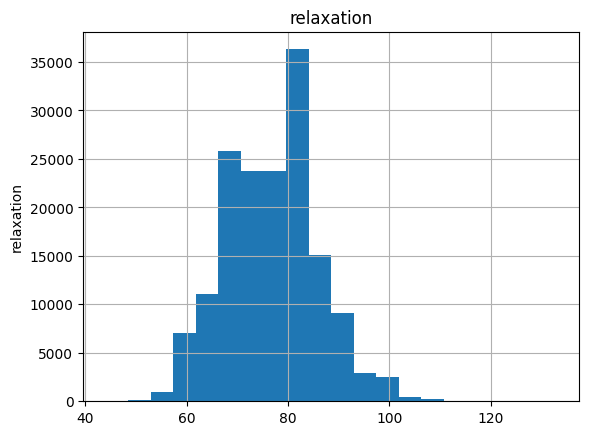

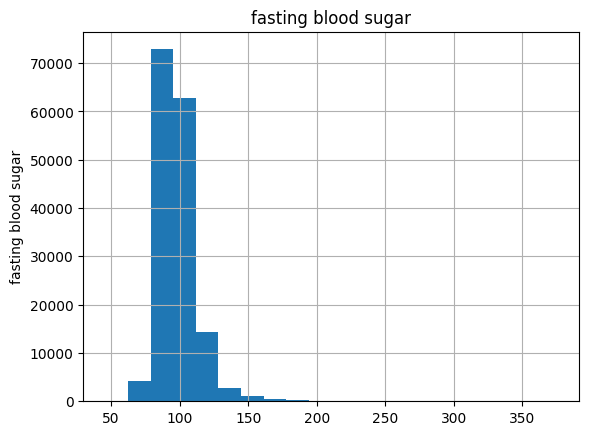

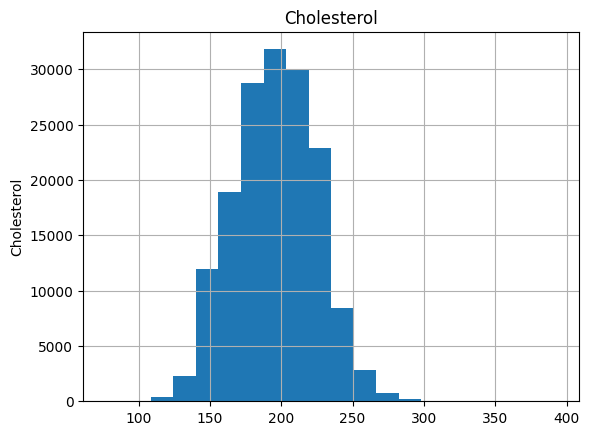

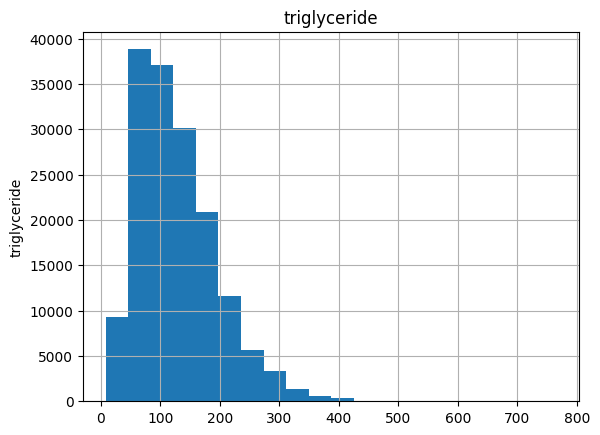

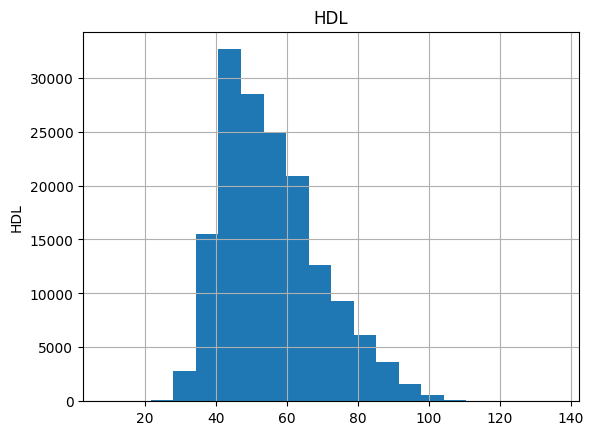

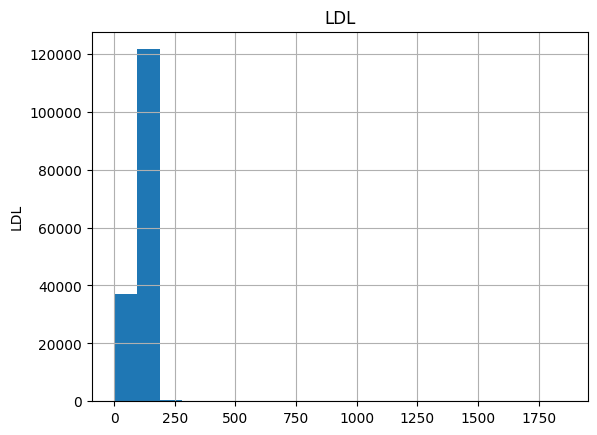

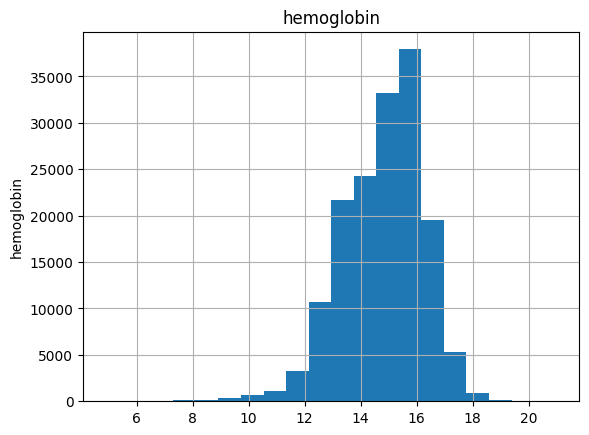

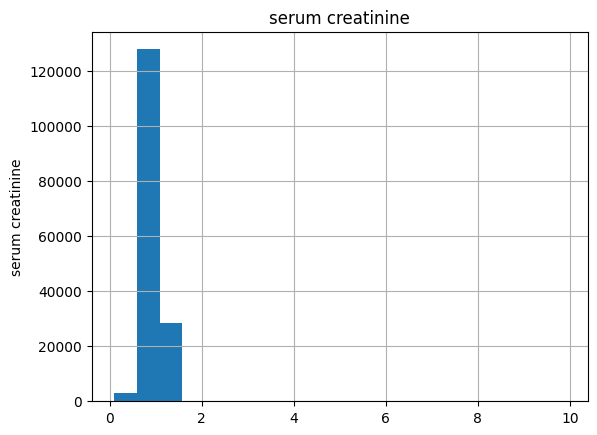

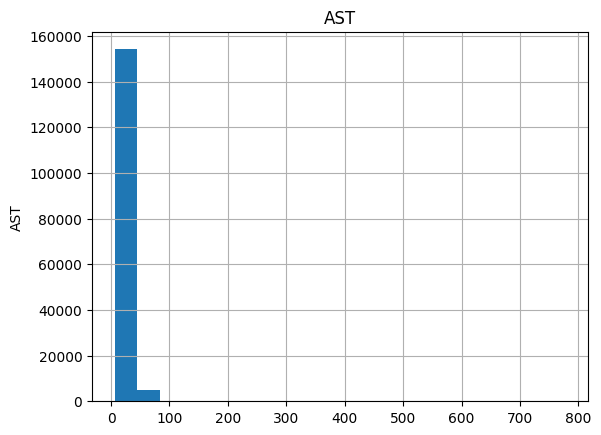

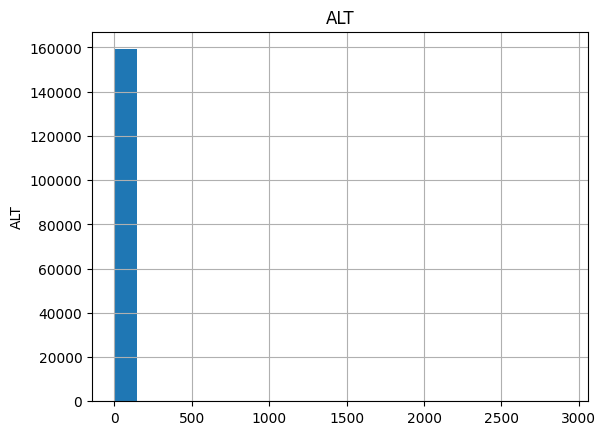

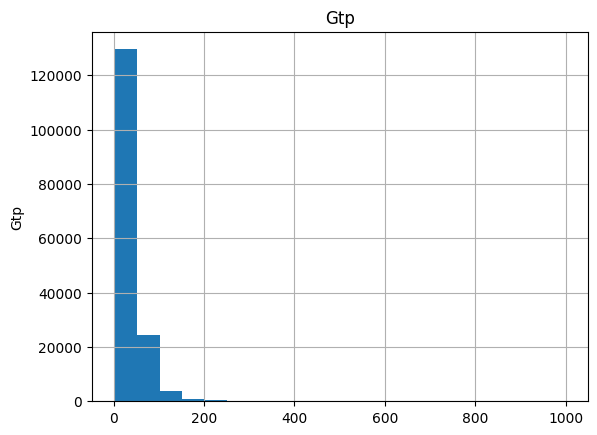

In [12]:
def continous_analyse(df, var):
    df = df.copy()
    df[var].hist(bins= 20)
    plt.ylabel(var)
    plt.title(var)
    plt.show()

for var in cont_vars:
    continous_analyse(train, var)

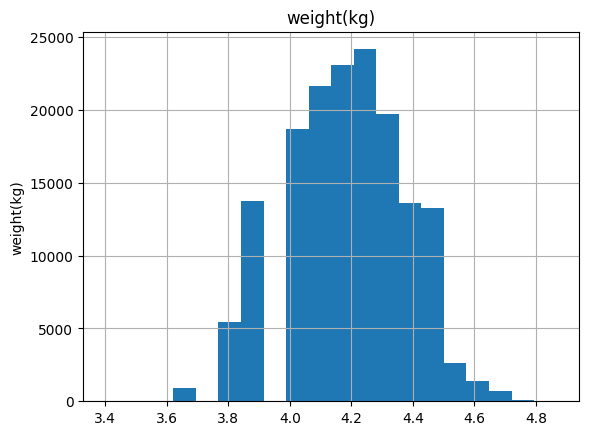

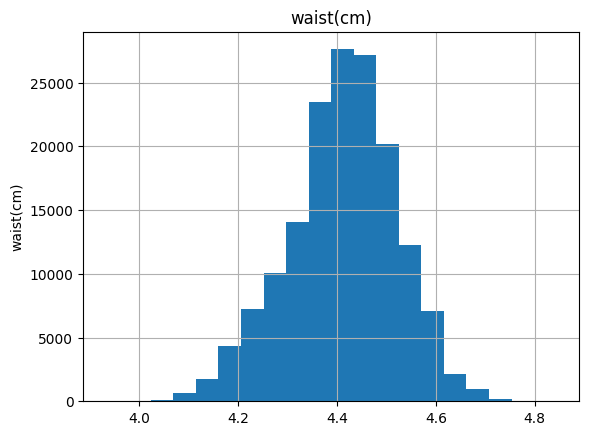

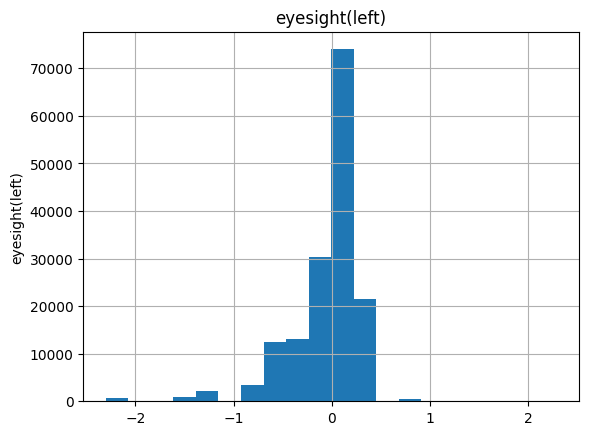

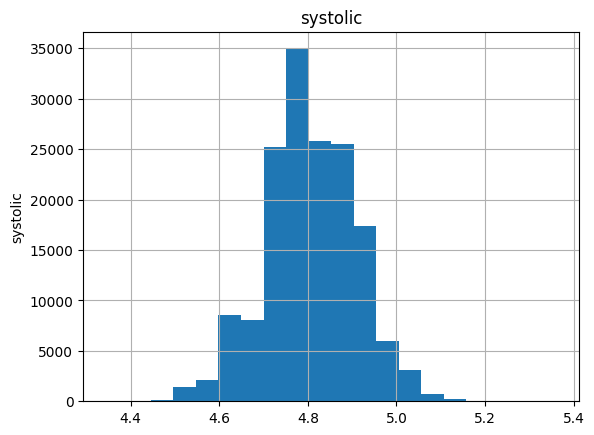

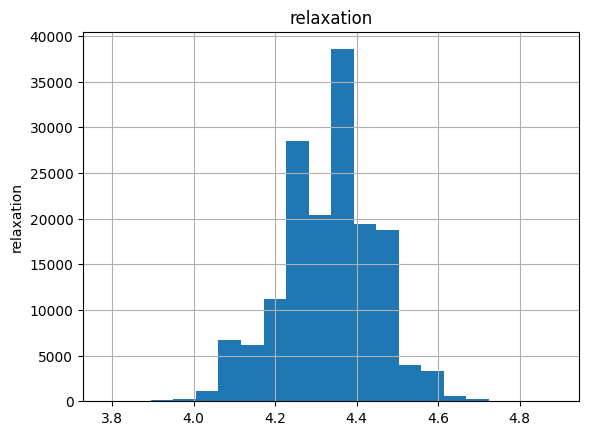

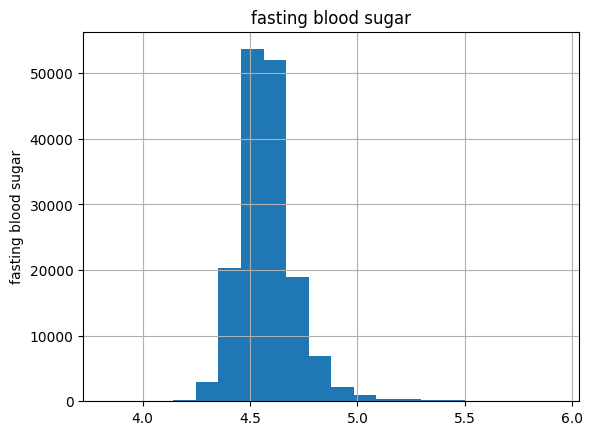

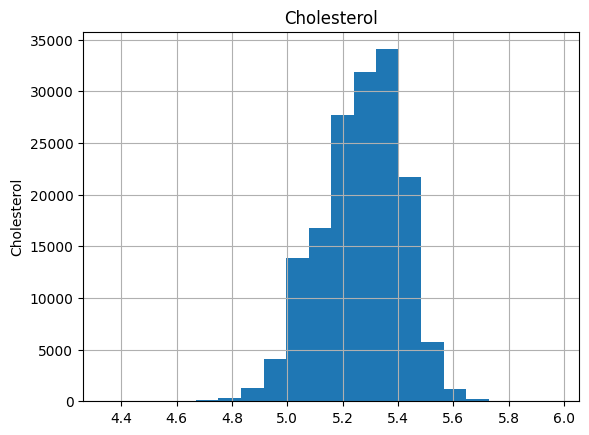

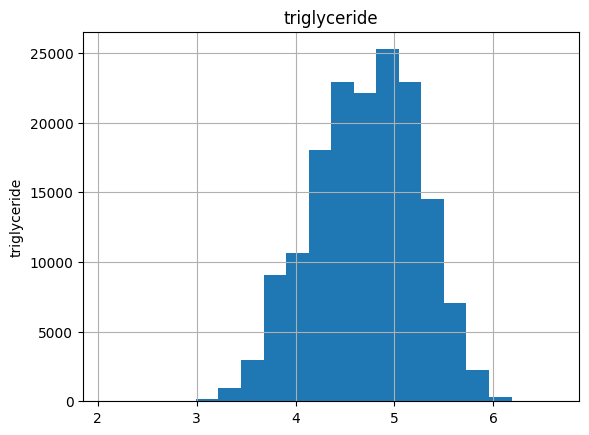

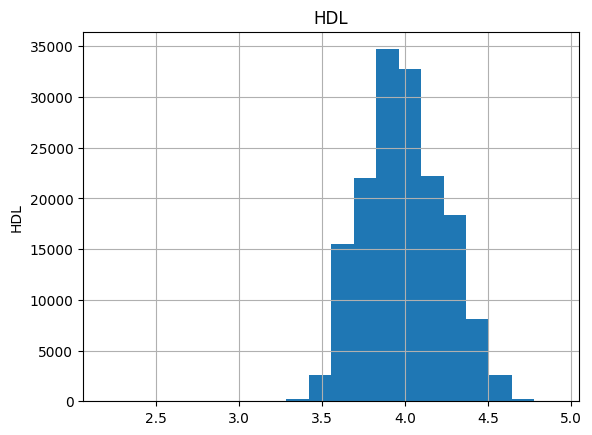

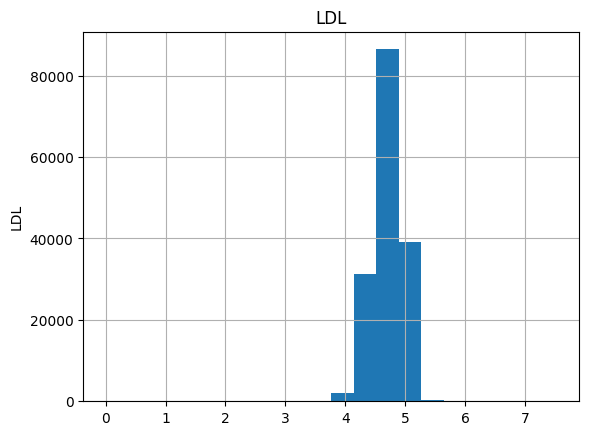

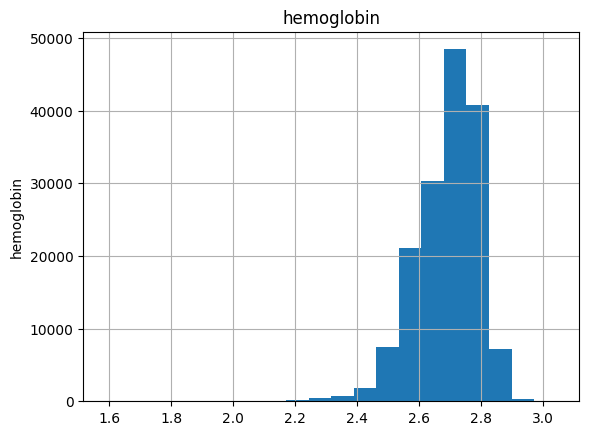

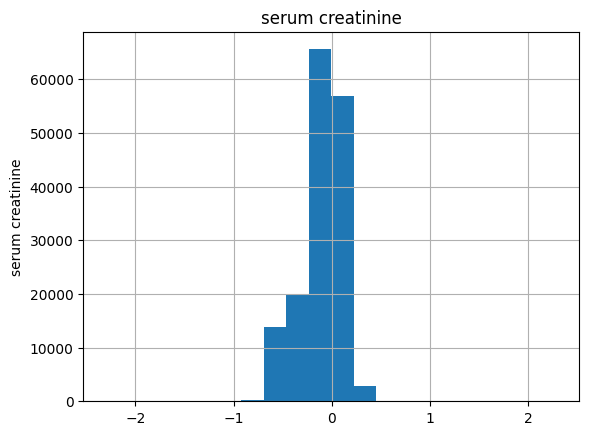

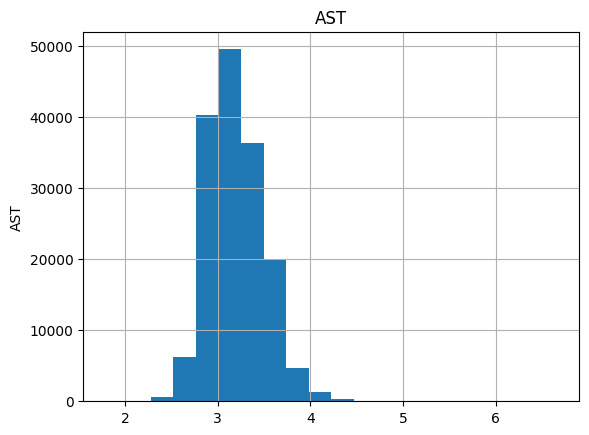

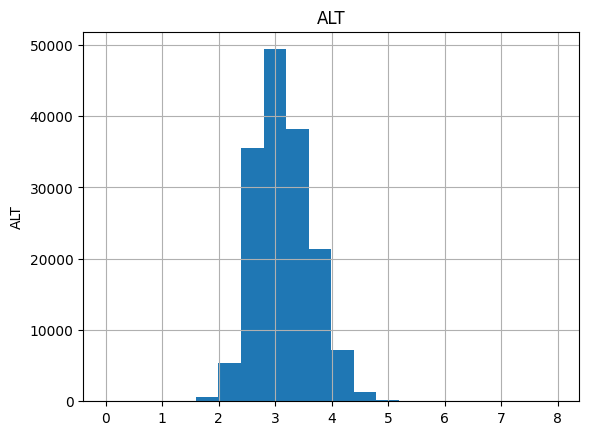

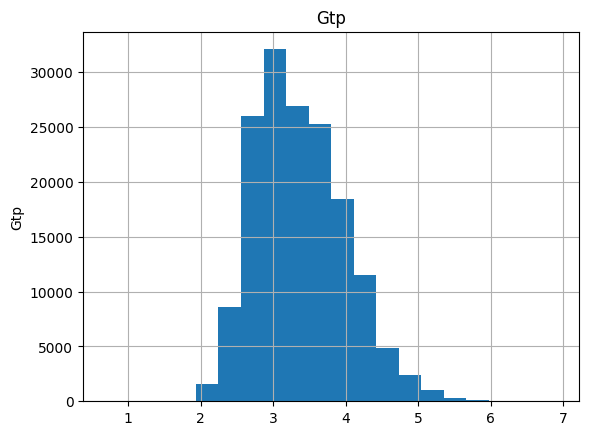

In [13]:
def analyze_continous(df, var): 
    df = df.copy()

    if 0 in df[var].unique():
        pass

    else: 
        df[var] = np.log(df[var])
        df[var].hist(bins= 20)
        plt.ylabel(var)
        plt.title(var)
        plt.show()

for var in cont_vars:
    analyze_continous(train, var)

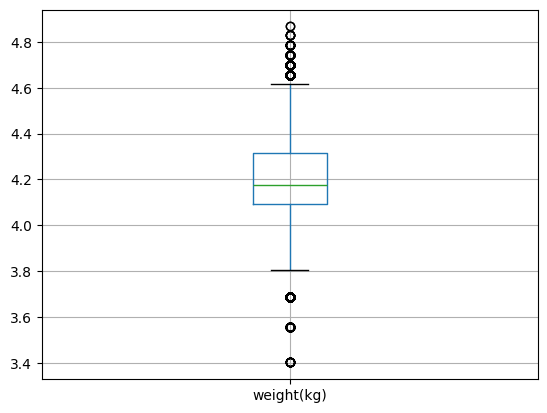

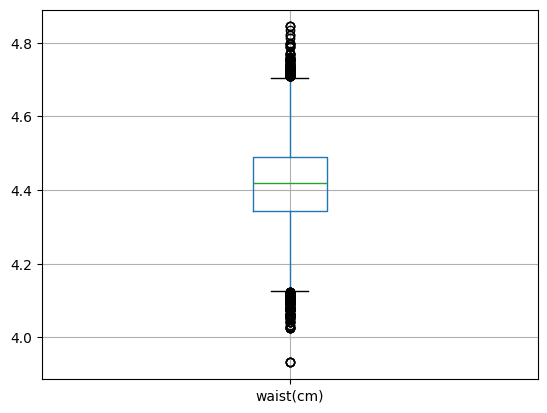

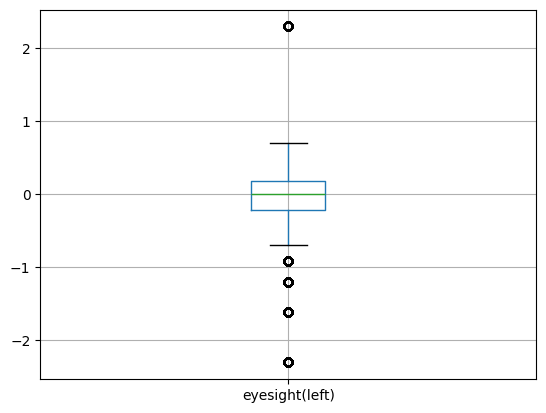

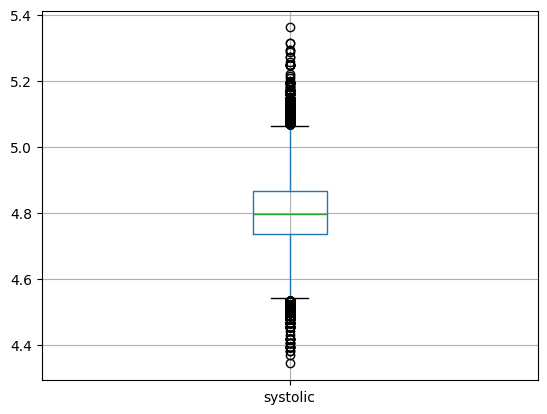

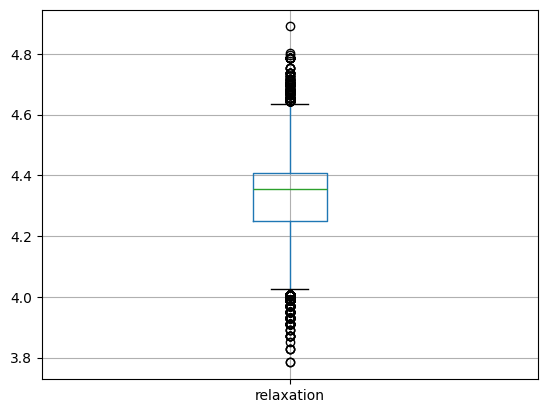

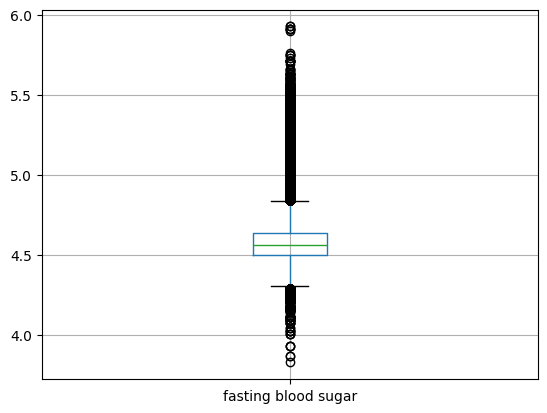

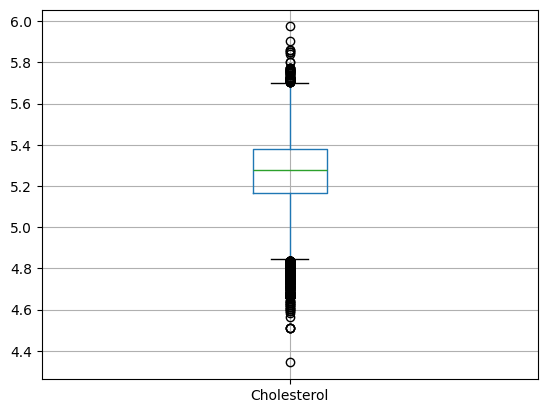

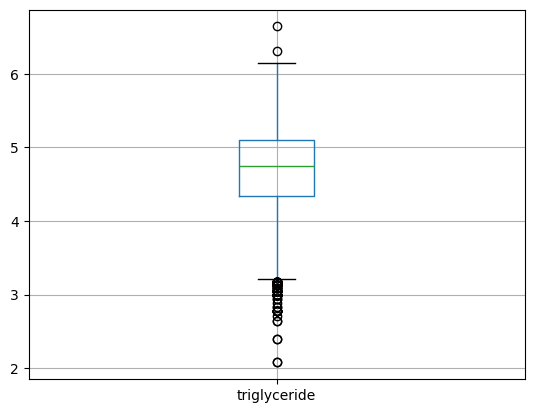

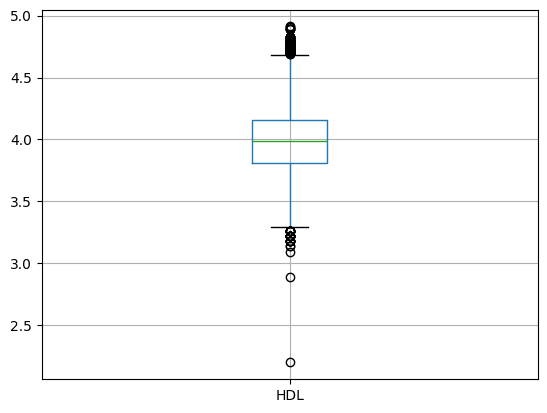

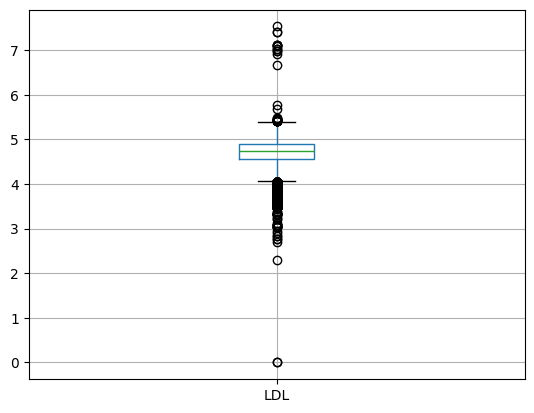

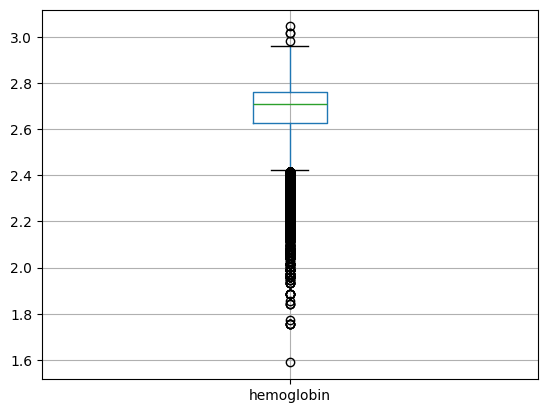

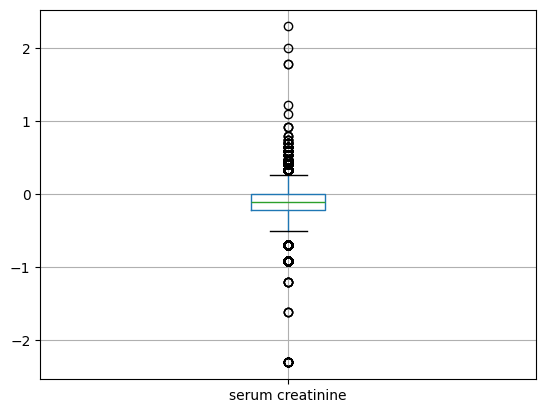

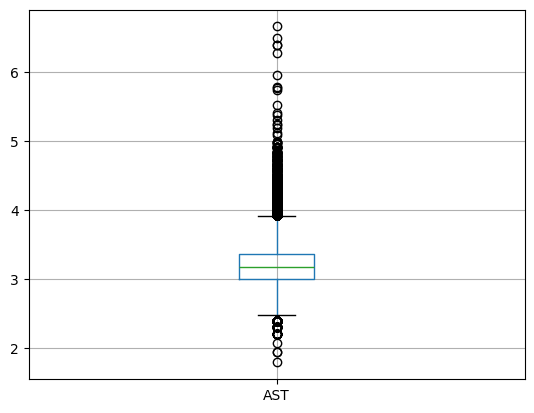

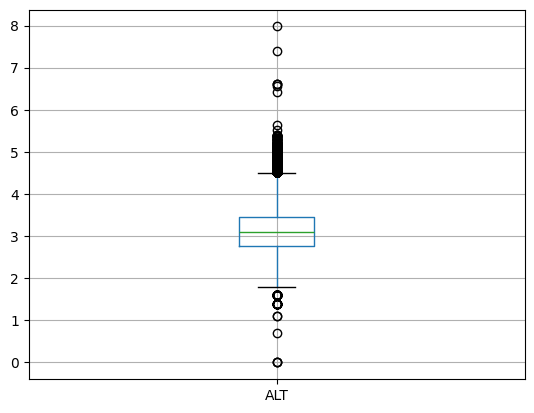

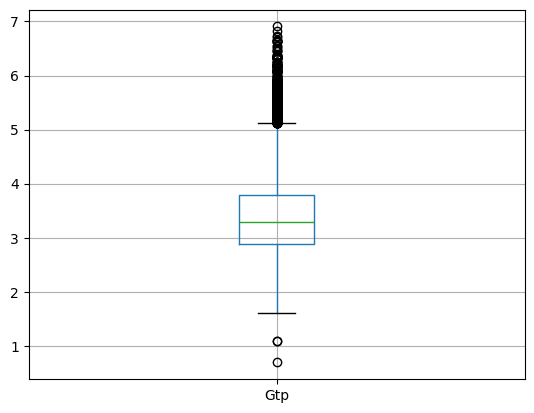

In [14]:
def transform_continous(df, var):
    df = df.copy()

    if 0 in df[var].unique():
        pass

    else:
        df[var] = np.log(df[var])
        df.boxplot(column = var)
        plt.show()


for var in cont_vars:
    transform_continous(train, var)

In [16]:
print(train.head())

   id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0   55         165          60       81.0             0.5   
1   1   70         165          65       89.0             0.6   
2   2   20         170          75       81.0             0.4   
3   3   35         180          95      105.0             1.5   
4   4   30         165          60       80.5             1.5   

   eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0              0.6              1               1       135          87   
1              0.7              2               2       146          83   
2              0.5              1               1       118          75   
3              1.2              1               1       131          88   
4              1.0              1               1       121          76   

   fasting blood sugar  Cholesterol  triglyceride  HDL  LDL  hemoglobin  \
0                   94          172           300   40   75        16.5   
1       